In [2]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 패키지 가져오기
from scipy.stats import shapiro

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [12]:
# 한글 폰트(맑은 고딕) 적용
# matplotlib.rc('font', family='Malgun Gothic')

In [4]:
df = pd.read_csv("./../data/ANOVA.csv", engine="python")
df.head(3)


,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a


In [5]:
# ANOVA 실행
# the 'C' indicates categorical data
model = ols('time ~ C(gangjong)', data = df).fit()

print(anova_lm(model))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


결론 : 유의수준 5%에서 P값이 0.02이므로 강종별 2차정련 시간에 차이가 있다고 할 수 있다.

## 연습(two way ANOVA)
- 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데, 강종별과 type에 따라 2차경련 시간에 차이가 있는지 검정하라(유의수준 0.05)


In [6]:
# 데이터 가져오기
df = pd.read_csv('./../data/ANOVA.csv', engine='python')


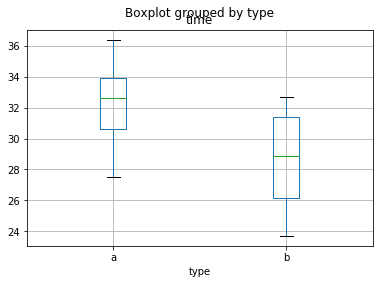

In [7]:
df.boxplot(column = 'time', by = 'type', grid = True)

In [11]:
# statsmodels 라이브러리 사용
formula = 'time ~ C(gangjong) + C(type) + C(gangjong):C(type)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

# 코릴레이션 : 두가지 변수가 독립변수인지 확인하는 방법?
# PR이 p-value

                       df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)           3.0  104.603333  34.867778  4.171868  0.019013
C(type)               1.0    4.886101   4.886101  0.584613  0.453437
C(gangjong):C(type)   3.0   15.670312   5.223437  0.624975  0.607190
Residual             20.0  167.156667   8.357833       NaN       NaN


## 추가실습 Two way ANOVA
- 본사에서는 대리점의 위치별(중심가, 시내, 쇼핑센터) 상품판매량에 차이가 있는지 검정하라(유의수준 5%)
|

In [17]:
df = pd.read_csv('./../data/storesales.csv', engine='python', encoding='euckr')
df.head(3)

,week,weekday,sales,position
0,1,Mon,6368,중심가
1,1,Tue,5922,중심가
2,1,Wed,8074,중심가


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

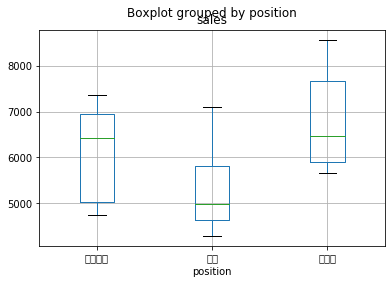

In [21]:
df.boxplot(column='sales', by='position', grid=True)

In [23]:
formula = 'sales ~ C(position)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

               df      sum_sq       mean_sq        F    PR(>F)
C(position)   2.0  17282882.8  8.641441e+06  9.14157  0.000506
Residual     42.0  39702212.0  9.452908e+05      NaN       NaN


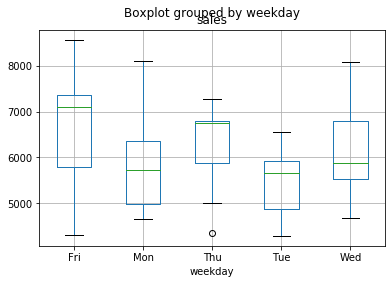

In [24]:
df.boxplot(column='sales', by='weekday', grid=True)

In [25]:
formula = 'sales ~ C(weekday) + C(position) + C(weekday):C(position)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

                          df        sum_sq       mean_sq         F    PR(>F)
C(weekday)               4.0  7.083747e+06  1.770937e+06  1.732501  0.168888
C(position)              2.0  1.728288e+07  8.641441e+06  8.453891  0.001225
C(weekday):C(position)   8.0  1.952911e+06  2.441138e+05  0.238816  0.980024
Residual                30.0  3.066555e+07  1.022185e+06       NaN       NaN


# 상관/회귀분석

## p.181 [연습]상관분석

- 부품수리시간과 부품 수간에 관계를 분석하기 위한 상관분석을 하세요.

In [28]:
# df 생성
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation p-value 결과  출력
print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.5f}'.format(pval))

Correlation Analysis
corr:0.989
p-value : 0.00000


### 결론 : 부품수리시간과 부품수간에 '매우 강한 상관성'이 있다고 할 수 있다.

## p.182 [실습]상관분석
 - 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.
 

In [30]:
# df 생성
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
       36.9, 37.5, 36.3, 38.1, 39.0, 36.9, 36.8, 37.6, 33.0, 33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation p-value 결과  출력
print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.5f}'.format(pval))


Correlation Analysis
corr:-0.723
p-value : 0.00032


In [31]:
np.sqrt(0.667)

0.8167006795638168

## p.202 [연습] 단순선형회귀
- 부품수리시간과 부품 수간에 관계를 분석하기 위한 회귀분석을 실시하고 회귀식을 도출

In [47]:
# 데이터선언
df_raw = pd.DataFrame({"UNITS":[1,2,3,4,4,5,6,6,7,8],
                      "MINUTES":[23,29,49,64,74,87,96,97,109,119]})

# Simple Linear Regression 실행
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


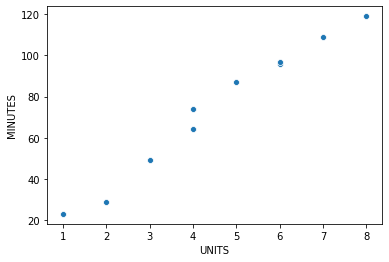

In [48]:
sns.scatterplot(x="UNITS", y="MINUTES", data=df_raw)

In [49]:
import statsmodels.api as sm

# Simple Linear Regression 실행
UNITS = sm.add_constant(df_raw["UNITS"])
model = sm.OLS(df_raw["MINUTES"], UNITS)
result = model.fit()

#simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        15:04:21   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

In [51]:
df_raw["MINUTES"].mean()

74.7

## p.204[실습] 단순선형회귀
 - 초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [52]:
df = pd.DataFrame({"Strength":[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,
                              36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
                  "Baking time":[0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,
                                0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]})

df.head(5)

,Strength,Baking time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [55]:
# Simple Linear Regression 실행
Baking_time = sm.add_constant(df["Baking time"])
model = sm.OLS(df["Strength"], Baking_time)
result = model.fit()

In [56]:
#simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        15:27:07   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0013      4.184      3.108      

## p.205[연습] 단순선형회귀
- 직무수행 평가결과와 관련인자의 산점도 확인 및 회귀분석을 하시오.


In [57]:
# 데이터 불러오기
df_raw = pd.read_csv("./../data/직무능력평가.csv", engine="python", encoding="euckr")
df_raw.head(3)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48


In [58]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression
# 선형모델 formula(y~x1+x2+...)
import statsmodels.formula.api as smf

# Linear Regression 실행
model = smf.ols(formula = "EVAL ~ DISSATIS", data=df_raw)

# 적합
result = model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.86
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.99e-08
Time:                        15:37:51   Log-Likelihood:                -99.882
No. Observations:                  30   AIC:                             203.8
Df Residuals:                      28   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3763      6.620      2.172      0.0

## p.207 [실습] 단순선형회귀
- 초코칩의 강도와 제조조건인 오븐온도와의 회귀분석과 회귀식을 도출하시오.


In [60]:
df_raw = pd.read_csv("./../data/correlation.csv", engine="python")

df_raw.head(3)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122


In [64]:
# Linear Regression 실행
model = smf.ols(formula = "strength ~ Oven_TMP", data=df_raw)

# 적합
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Thu, 23 Jan 2020   Prob (F-statistic):              0.737
Time:                        15:49:15   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0